In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [3]:
df = pd.read_csv('./data/Incheon_populationv2.csv',encoding = 'euc-kr',index_col=0)

In [4]:
df

,man(korean),woman(korean),man(foreigner),woman(foreigner),oldman
year,,,,,
2011,1410980,1390294,30523,19694,250528
2012,1431593,1412388,28099,19206,260107
2013,1448835,1430947,30027,20355,282471
2014,1459074,1443534,33030,22293,298818
2015,1469869,1455946,33770,23899,312905
2016,1477671,1465398,34394,24709,324255
2017,1479597,1468945,36353,26243,345024
2018,1481844,1472798,39200,28669,362675
2019,1482249,1474777,41155,31104,384506


In [5]:
# df['year'] = df['year'].astype(str)

In [6]:
print(df.index.to_list())

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


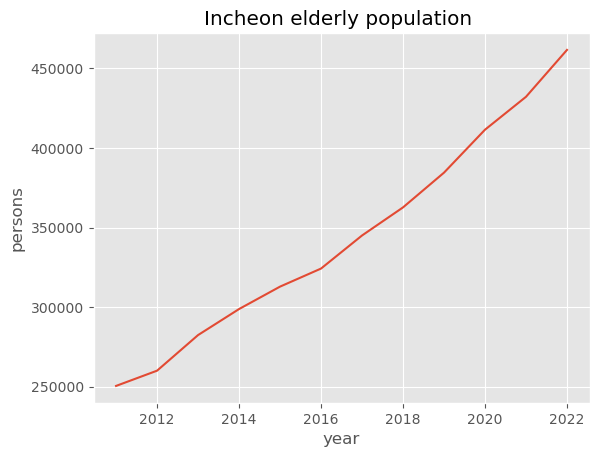

In [7]:
plt.style.use('ggplot')
plt.title('Incheon elderly population ')
plt.xlabel('year')
plt.ylabel('persons')
plt.plot(df['oldman'])
plt.show()

In [18]:
df.loc[2020 ,  'woman(korean)   ] 

NameError: name 'woman' is not defined

In [ ]:
print(df.iloc[0])

In [ ]:
#제일 노인인구가 적었던 해 

In [ ]:
df.loc[ df['oldman'] == df['oldman'].min() , ]

In [ ]:
#제일 노인인구가 많았던 해 

In [ ]:
df.loc[ df['oldman'] == df['oldman'].max() , ]

In [ ]:
df

In [ ]:
print(df.loc[[2019,2020],['man(korean)','woman(korean)','man(foreigner)','woman(foreigner)']])

In [ ]:
df2= df.loc[2020]

In [ ]:
plt.pie(df2, labels = df2.index, autopct='%.1f',startangle=90,wedgeprops={'width':0.8})
plt.legend()
plt.title('2020 Incheon population')
plt.show()

In [ ]:
df.describe()

In [ ]:
# 총 인구 수 와 노인의 상관 관계 

In [ ]:
df2=df.sum(axis=1)

In [ ]:
df2

In [ ]:
df['sum'] = df2

In [ ]:
df

In [ ]:
plt.scatter(data = df, x= 'sum', y= 'oldman')
plt.title('Population Vs Oldman')
plt.xlabel('Population Total')
plt.ylabel('Oldman')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[ : , 'man(korean)' : 'woman(foreigner)'  ]  

In [ ]:
y = df['oldman']

In [ ]:
y

In [ ]:
# Scikit-Learn 의 LinearRegression 은, 자동으로 피쳐 스케일링을 해준다.

In [ ]:
# Train / Test 로 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,  random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression() #선형회계 

In [ ]:
#학습

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
X_train

In [ ]:
y_pred = regressor.predict(X_test) #테스트 값을 넣고 예측.

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
((y_test - y_pred) ** 2 ).mean()

In [ ]:
new_data = np.array( [1477671,1465398,34394,24709] )

In [ ]:
new_data

In [ ]:
new_data = new_data.reshape(1,4)

In [ ]:
new_data.ndim

In [ ]:
regressor.predict(new_data) ## 예측

In [ ]:
import joblib

In [ ]:
joblib.dump(regressor,'regressor.pkl')